In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/hp/Downloads/A_Z Handwritten Data/A_Z Handwritten Data.csv")
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df.drop('0', axis=1)

y = df['0']


In [4]:
import string
label_map = {i: char for i, char in enumerate(string.ascii_uppercase)}
y_mapped = y.map(label_map)

print(y_mapped.value_counts())  


0
O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13869
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: count, dtype: int64


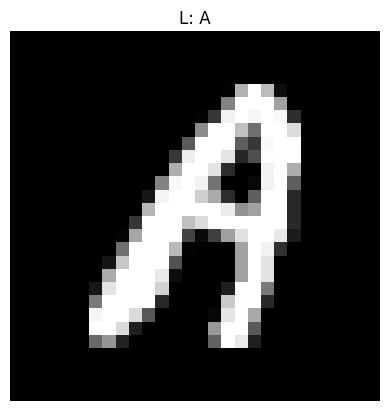

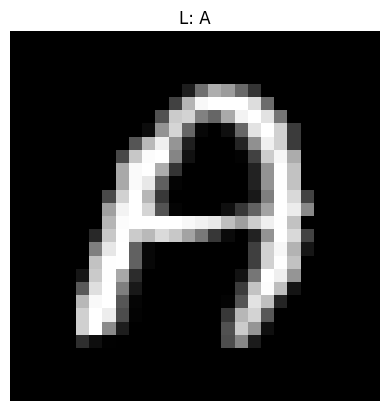

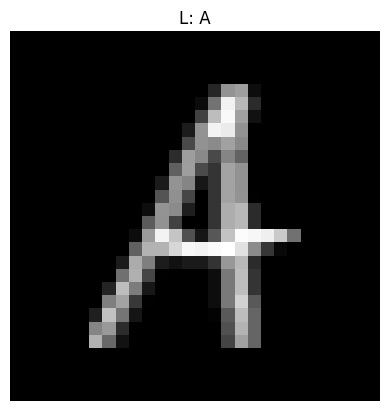

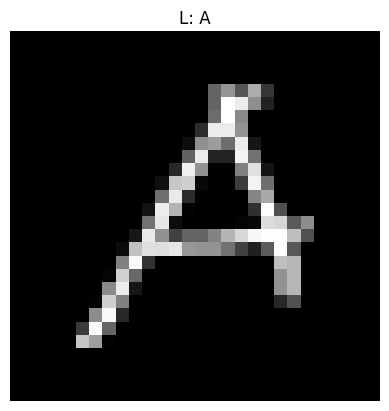

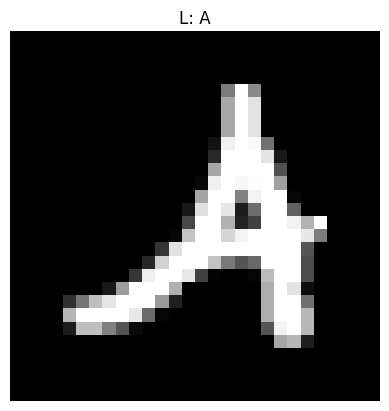

In [5]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(5):
    img = np.array(X.iloc[i]).reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"L: {label_map[y.iloc[i]]}")
    plt.axis('off')
    plt.show()


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


X_np = X.values.astype('float32') / 255.0  

X_np = X_np.reshape(-1, 28, 28, 1) 

y_cat = to_categorical(y, num_classes=26)

X_train, X_test, y_train, y_test = train_test_split(X_np, y_cat, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")


Training samples: 297960
Test samples: 74490


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [8]:
model = Sequential()


model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(26, activation='softmax'))  


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2, 
    verbose=1
)


Epoch 1/10
1863/1863 [==============================] - 223s 117ms/step - loss: 0.3573 - accuracy: 0.8984 - val_loss: 0.0869 - val_accuracy: 0.9759
Epoch 2/10
1863/1863 [==============================] - 206s 110ms/step - loss: 0.1444 - accuracy: 0.9595 - val_loss: 0.0687 - val_accuracy: 0.9807
Epoch 3/10
1863/1863 [==============================] - 207s 111ms/step - loss: 0.1119 - accuracy: 0.9690 - val_loss: 0.0575 - val_accuracy: 0.9841
Epoch 4/10
1863/1863 [==============================] - 205s 110ms/step - loss: 0.0910 - accuracy: 0.9744 - val_loss: 0.0528 - val_accuracy: 0.9853
Epoch 5/10
1863/1863 [==============================] - 216s 116ms/step - loss: 0.0796 - accuracy: 0.9776 - val_loss: 0.0460 - val_accuracy: 0.9879
Epoch 6/10
1863/1863 [==============================] - 204s 110ms/step - loss: 0.0706 - accuracy: 0.9801 - val_loss: 0.0453 - val_accuracy: 0.9882
Epoch 7/10
1863/1863 [==============================] - 205s 110ms/step - loss: 0.0629 - accuracy: 0.9818 - val_

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\n✅ Test accuracy: {test_acc * 100:.2f}%")
print(f"🧪 Test loss: {test_loss:.4f}")


2328/2328 [==============================] - 25s 11ms/step - loss: 0.0371 - accuracy: 0.9913

✅ Test accuracy: 99.13%
🧪 Test loss: 0.0371


In [13]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)


Epoch 1/10
9312/9312 [==============================] - 321s 34ms/step - loss: 0.0717 - accuracy: 0.9791 - val_loss: 0.0451 - val_accuracy: 0.9890
Epoch 2/10
9312/9312 [==============================] - 327s 35ms/step - loss: 0.0636 - accuracy: 0.9816 - val_loss: 0.0389 - val_accuracy: 0.9900
Epoch 3/10
9312/9312 [==============================] - 319s 34ms/step - loss: 0.0574 - accuracy: 0.9832 - val_loss: 0.0421 - val_accuracy: 0.9903
Epoch 4/10
9312/9312 [==============================] - 320s 34ms/step - loss: 0.0544 - accuracy: 0.9841 - val_loss: 0.0379 - val_accuracy: 0.9905
Epoch 5/10
9312/9312 [==============================] - 326s 35ms/step - loss: 0.0507 - accuracy: 0.9850 - val_loss: 0.0375 - val_accuracy: 0.9911
Epoch 6/10
9312/9312 [==============================] - 321s 34ms/step - loss: 0.0476 - accuracy: 0.9857 - val_loss: 0.0411 - val_accuracy: 0.9899
Epoch 7/10
9312/9312 [==============================] - 323s 35ms/step - loss: 0.0464 - accuracy: 0.9862 - val_loss: 0

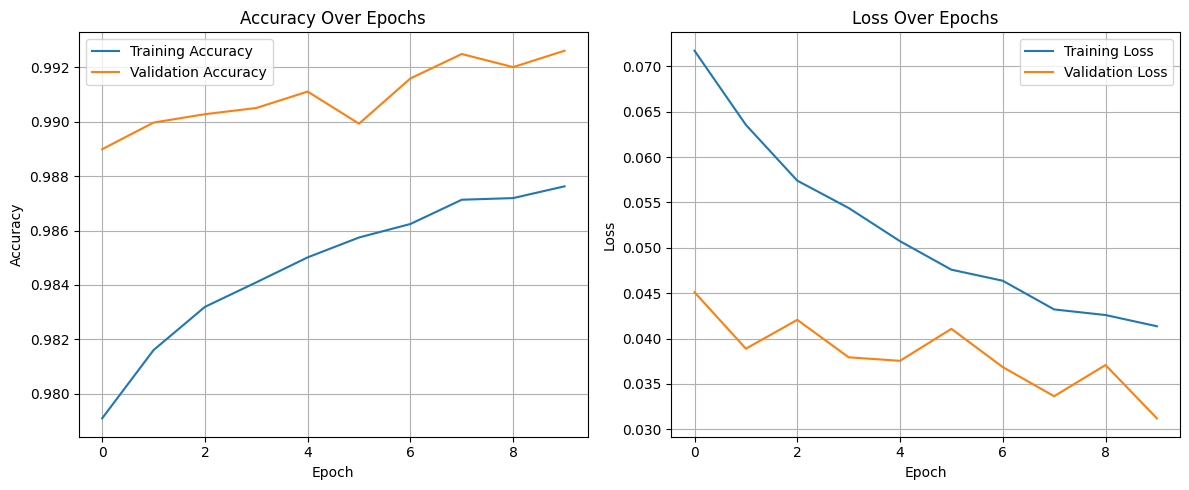

In [14]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [19]:
model.save("model_handwriting.keras")



In [20]:
model = tf.keras.models.load_model("model_handwriting.keras")


In [1]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
import numpy as np
import tensorflow as tf

In [6]:
model = tf.keras.models.load_model("model_handwriting.h5")


class DrawingApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Draw and recognize a letter")
        
        self.canvas = tk.Canvas(self.root, width=280, height=280, bg='white')
        self.canvas.pack()
        
        self.image = Image.new("L", (280, 280), 255) 
        self.draw = ImageDraw.Draw(self.image)

        self.canvas.bind("<B1-Motion>", self.paint)
        
        tk.Button(self.root, text="Predict the letter", command=self.predict).pack()
        tk.Button(self.root, text="Delete", command=self.clear).pack()

        self.label = tk.Label(self.root, text="", font=("Helvetica", 24))
        self.label.pack()

    def paint(self, event):
        x1, y1 = (event.x - 8), (event.y - 8)
        x2, y2 = (event.x + 8), (event.y + 8)
        self.canvas.create_oval(x1, y1, x2, y2, fill='black')
        self.draw.ellipse([x1, y1, x2, y2], fill=0)

    def clear(self):
        self.canvas.delete("all")
        self.draw.rectangle([0, 0, 280, 280], fill=255)
        self.label.config(text="")

    def predict(self):
      
        img = self.image.resize((28, 28))
        img = ImageOps.invert(img)
        img_np = np.array(img).astype("float32") / 255.0
        img_np = img_np.reshape(1, 28, 28, 1)

        prediction = model.predict(img_np)
        predicted_class = np.argmax(prediction)

        predicted_letter = chr(predicted_class + 65)  # A-Z
        self.label.config(text=f"predicted letter: {predicted_letter}")


In [8]:

root = tk.Tk()
app = DrawingApp(root)
root.mainloop()

1/1 [==============================] - 0s 30ms/step
